Model loaded from: trained_model.keras
Found 776 files belonging to 6 classes.
Class names: ['CCI_Caterpillars', 'CCI_Leaflets', 'Healthy_Leaves', 'WCLWD_DryingofLeaflets', 'WCLWD_Flaccidity', 'WCLWD_Yellowing']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


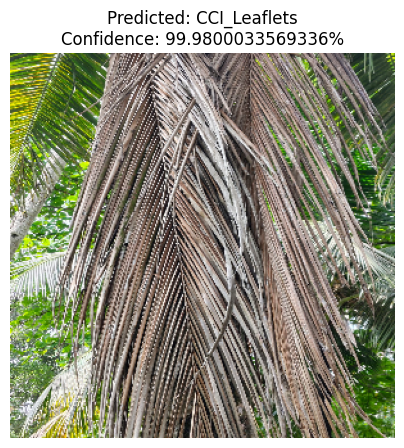

In [13]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Enable NumPy behavior for TensorFlow tensors (needed for prediction function)
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Constants
IMG_HEIGHT = 300
IMG_WIDTH = 300
MODEL_PATH = "trained_model.keras"
BASE_DIR = "Plant Village"  # Used to load class names from test set

# Step 1: Load the trained model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded from:", MODEL_PATH)

# Step 2: Load class names from the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(BASE_DIR, "test"),
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32  # Batch size doesn’t matter here, just for loading
)

class_names = test_ds.class_names
print("Class names:", class_names)

# Step 3: Prediction function
def predict(model, img):
    img_array = tf.expand_dims(img, 0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = round(100 * tf.reduce_max(predictions[0]), 2)
    return predicted_class, confidence

# Step 4: Function to test a single image from your choice
def test_custom_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Predict
    predicted_class, confidence = predict(model, img_array)
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array.astype("uint8"))
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
    plt.show()

# Step 5: Specify your image path and test
# Replace this with the path to your chosen image
custom_image_path = "WhatsApp Image 2025-03-03 at 10.37.16_31f3089d.jpg"  # Example: "Plant Village/test/WCLWD_Yellowing/sample.jpg"
test_custom_image(custom_image_path)